In [1]:
# coding: utf-8

#######################################################
#Homework 4
#######################################################


##############################
#prepare data 
##############################
import pandas as pd
import numpy as np
from itertools import combinations
from apyori import apriori  
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv('cars.csv')

In [325]:
########################################################
#Problem 1
#Entropy, Information Gain, Feature Selection
########################################################

# Compute entropy for a vector with symbolic values
# Input: vector of symbolic values
# Output: Entropy (in bits)
def entropy(x):
    # p(yi) = (# of records with y = yi) / (total # of records)
    # I(yi) = -log2p(yi)
    # Entropy = H(y)  = p(yi) * I(yi) for all i = -p(yi) * log2p(yi) for all i
    unique_vals, unique_counts = np.unique(x, return_counts=True)
    total_records = x.size
    entrop = 0
    prob = unique_counts/total_records
    info_content = np.log2(prob)
    for ind in range(0,len(unique_vals)):
        entrop += -prob[ind] * info_content[ind]
    return entrop


# Unit test for function entropy()
x = np.concatenate((np.repeat('A',3),np.repeat('B',2),np.repeat('C',5)))
np.testing.assert_almost_equal(entropy(x), 1.485475, decimal = 4, err_msg="Entropy function test failed")

print("Entropy of the class attribute is ", entropy(df['class']))

Entropy of the class attribute is  1.205740970012175


In [322]:
# Compute information gain IG(x,y)
# Inputs: x, y: vectors of symbolic values of equal length
# Output: information gain IG(x,y)
def info_gain(x,y):
    # IG(y,x) = H(y) - H(y|x)
    # H(y|x) = p(x=xj)*H(y|x=xj)
    #  @@@@@@@@@TODO: Your implementation goes here @@@@@@@@@
    
    ent_of_y = entropy(y) # find H(y) using entropy formula
    
    # find p(x=xj)
    unique_vals_x, unique_counts_x = np.unique(x, return_counts=True) 
    total_records_x = x.size
    prob_x = unique_counts_x/total_records_x
    H_y_x =0
    # find p(y|x=xj)
    for ind in range(0,len(unique_vals_x)):
        val = unique_vals_x[ind] # find the value of the unique x
        i = np.where(x == val) # find the indices for this value of x 
        indices = i[0] # store all the indices 
        cond_total = len(indices) # find the total number of records of this value
        cond_y_vals = y[indices] # find the y values corresponding to the unique x value
        H_y_xj = entropy(cond_y_vals) # find the entropy of the y values corresponding to x value
        p = prob_x[ind] * H_y_xj # multiply by the probability of the x value occuring 
        H_y_x += p # add H(y|x)
    ig = ent_of_y - H_y_x # find the information gain
    return ig

# Unit test for function info_gain()
x = np.concatenate((np.repeat('A',3),np.repeat('B',2),np.repeat('C',5)))
y = np.concatenate((np.repeat('X',4),np.repeat('Y',6)))
np.testing.assert_almost_equal(info_gain(x, y), 0.7709506, decimal = 4, err_msg="Info gain function test failed")

# find the information gain of class vs price
print("The information gain of class versus price is: ", info_gain(df['class'], df['price']))

rig = ((info_gain(df['class'], df['price'])) / (entropy(df['class']))) * 100

print("The relative information gain of class versus price using class as the output dimension is: ", rig)


The information gain of class versus price is:  0.08681002514950231
The relative information gain of class versus price using class as the output dimension is:  7.199724261557251


PROBLEM 1 PART C
PART i
---------------------------------------------------
The following is for a feature set of size  1 :
---------------------------------------------------
  Features  InfoGain  RelativeInfoGain
0   safety  0.261399          0.216796
1  persons  0.219663          0.182181
2    price  0.086810          0.071997
3    trunk  0.030008          0.024888
4    doors  0.004486          0.003720
---------------------------------------------------
The following is for a feature set of size  2 :
---------------------------------------------------
         Features  InfoGain  RelativeInfoGain
0  persons safety  0.523200          0.433924
1    safety price  0.363642          0.301592
2    trunk safety  0.320800          0.266061
3   persons price  0.314695          0.260997
4    doors safety  0.268823          0.222953
5   persons trunk  0.254670          0.211215
6   doors persons  0.227731          0.188872
7     trunk price  0.121993          0.101177
8     doors price  0.091

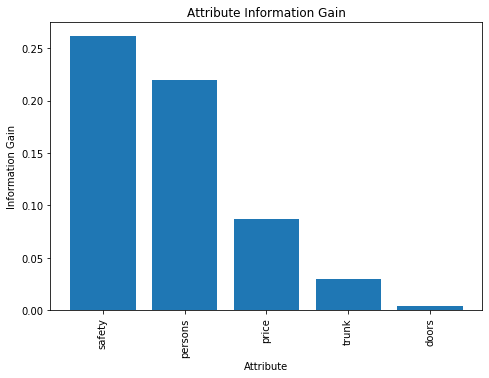

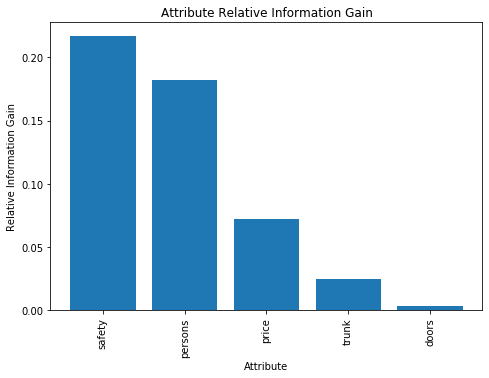

In [326]:
import matplotlib.pyplot as plt

# Information-gain based feature selection: exhaustive search
# (The function is provided to you, no need to re-code)
# Input: df, a data frame 
#        m, size of feature set, default is 1
#        output_col, the column name of the output column
# Output: data frame with name(s) of selected feature(s), information gain, relative information gain, sorted by the value of information gain
def features(df, m = 1, output_col = "price"):
    output = df[output_col] # output column
    outputEnt = entropy(output) # entropy for output attribute
    # all combinations of m features 
    columns_comb_list = combinations(df.drop(output_col, axis = "columns").columns, m) 
    
    info_gains = [] # data frame for information gains
    # iterate through all combinations of idx
    for columns_comb in columns_comb_list:
        # create a new feature where each element is a concatenation of all values across columns
        input_df = df[list(columns_comb)].apply(lambda x: ' '.join(x), axis=1)
        # compute information gain between new feature and output attribute
        ig = info_gain(input_df, output)
        # compute relative infomration gain
        rig = ig / outputEnt
        # concatenate the results
        info_gains.append({"Features": " ".join(columns_comb), "InfoGain": ig, "RelativeInfoGain": rig})
    return sorted(info_gains, key = lambda x: x['InfoGain'], reverse = True) # Sort by descending info gain

print("PROBLEM 1 PART C")
print("PART i")
# feature selection for feature set sizes 1,2,3
for i in range(1,4):
    print("---------------------------------------------------")
    print("The following is for a feature set of size ", i, ":")
    print("---------------------------------------------------")
    feat = pd.DataFrame(features(df,i, "class"))
    print(feat)

    
print("PART ii")
feat = pd.DataFrame(features(df,1, "class"))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(feat['Features'],feat['InfoGain'])
ax.set_ylabel('Information Gain')
ax.set_xlabel('Attribute')
ax.set_title('Attribute Information Gain')
ax.set_xticklabels(feat['Features'], rotation=90)
plt.show()

fig2 = plt.figure()
ax2 = fig2.add_axes([0,0,1,1])
ax2.bar(feat['Features'],feat['RelativeInfoGain'])
ax2.set_ylabel('Relative Information Gain')
ax2.set_xlabel('Attribute')
ax2.set_title('Attribute Relative Information Gain')
ax2.set_xticklabels(feat['Features'], rotation=90)
plt.show()

Question 1C Short Answer 

i. The above metrics, you can see that the biggest jump for relative information gain is going from a feature set of 1 to a feature set of 2. The metrics also show that after the first couple feature combinations for set size =2 and set size = 3, the difference between the last variable chosen isn't that great. However, for both set size = 2 and set size = 3, one variable (or two variables for set size =3) provide the most information and are included in all the first combinations of set groupings. This also correlates with the rankings of the features in set size = 1.

iii. The key factors that apparently determine a person's preference's about cars seem to make sense. Having safety perform highly as an indicator of a person's preferences aligns with expectations. The one attribute that does not seem to make logical sense is the number of doors not being a strong indicator. This can be rationed out though by the fact that most cars have 4 doors, so it does not add that much information to know that a car has 4 doors since we are expecting that and there isn't a high variance between different models. 

Question 1D Short Answer 

Given the result obtained in (c) the feature that would be used for splitting data at root node if we used ID3 algorithm to learn the decision tree would be 'Safety'. This is because the ID3 algorithm splits on the attribute with the highest Information Gain.

In [297]:
########################################################
#Problem 2
#Association Rules
########################################################

# prepare dataset for transaction format
records = [] 
cols = list(df)
nRow, nCol = df.shape
for i in range(0, nRow):
    # concatenate colume name and value
    records.append([str(cols[j]+" is "+df.values[i,j]) for j in range(0, nCol)])

## records[1] # ['doors is 2','persons is 2','trunk is big','safety is high','class is unacc','price is high']
this_rules = apriori(records, min_support = 0.1, min_confidence = 0.5)

## get rules with RHS = output_col
def get_clean_rules(rules,output_col = "price is high"):
    rules = [rule for rule in rules if output_col in rule.items]
    clean_rules = {}
    for rule in rules:
        support = rule.support
        # Select rules with right side containing output
        for r in [sb for sb in rule.ordered_statistics if (output_col in sb.items_add and len(sb.items_base) > 0)]:
            clean_rules["{} => {}".format(" + ".join(r.items_base), output_col)] = {"support": support, "confidence": r.confidence}            
    return(clean_rules)


rf = get_clean_rules(this_rules)
df_rules = pd.DataFrame.from_dict(rf, orient='index')
print("The number of rules that meet the criteria is: ", len(df_rules))
print("\nTop 5 rules based on support:")
print(df_rules.sort_values(by=['support'], ascending = 0)[0:5])
print("\nTop 5 rules based on confidence:")
print(df_rules.sort_values(by=['confidence'], ascending = 0)[0:5])

The number of rules that meet the criteria is:  21

Top 5 rules based on support:
                                  support  confidence
class is unacc => price is high  0.395833    0.565289
safety is high => price is high  0.168403    0.506969
persons is 2 => price is high    0.166667    0.500000
trunk is med => price is high    0.166667    0.500000
trunk is big => price is high    0.166667    0.500000

Top 5 rules based on confidence:
                                                    support  confidence
persons is 4 + class is unacc => price is high     0.114583    0.634615
safety is high + class is unacc => price is high   0.100694    0.632727
safety is med + class is unacc => price is high    0.130208    0.618132
persons is more + class is unacc => price is high  0.114583    0.614907
trunk is med + class is unacc => price is high     0.129051    0.568878


In [296]:
import math
# Inputs: rules, the object returned by the apriori function
#         df, a data frame from which the rules are learned
# Output: a rule object with extra metrics (95% CI of score)
def expand_rule_metrics(rules, output_col = "price is high"):
    # Select rules with right side output
    clean_rules = get_clean_rules(rules,output_col)
    
    # Extraction metrics
    confidence = pd.DataFrame.from_dict(clean_rules, orient='index')
    lower = []
    upper = []
    # score = fraction - (1.96* sqrt(fraction*(1-fraction)))/sqrt(support(body)) 
    # making the assumption 
    for i in range(0,len(confidence)):
        su, co = confidence.iloc[i]
        bod = (1.96 * np.sqrt(co * (1-co))) / np.sqrt(su)
        low = co - bod
        up = co + bod
        lower.append(low)
        upper.append(up)
    confidence['low'] = lower
    confidence['high'] = upper
    return confidence
expand_rule_metrics(this_rules)

,support,confidence,low,high
class is unacc => price is high,0.395833,0.565289,-0.979024,2.109603
doors is 2 + class is unacc => price is high,0.104745,0.555215,-2.454285,3.564715
doors is 2 => price is high,0.125000,0.500000,-2.271859,3.271859
doors is 3 => price is high,0.125000,0.500000,-2.271859,3.271859
doors is 4 => price is high,0.125000,0.500000,-2.271859,3.271859
doors is 5more => price is high,0.125000,0.500000,-2.271859,3.271859
persons is 2 + class is unacc => price is high,0.166667,0.500000,-1.900500,2.900500
persons is 2 => price is high,0.166667,0.500000,-1.900500,2.900500
persons is 4 + class is unacc => price is high,0.114583,0.634615,-2.153596,3.422827
persons is 4 => price is high,0.166667,0.500000,-1.900500,2.900500


The AUC score for test is  0.4531
The AUC score for train is  0.6503
The AUC score training on all the data is  0.6105


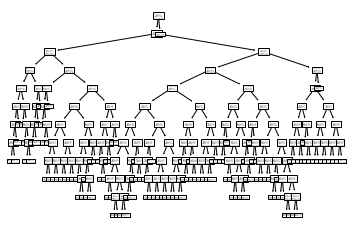

In [6]:
########################################################
#Problem 3
#Decision Tree
########################################################
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn import metrics
feat = list(df.columns)
feat.remove('price')
X = df.loc[:,feat]
X.loc[:,'doors'],door_names = pd.factorize(X['doors'])
X.loc[:,'persons'],persons_names = pd.factorize(X['persons'])
X.loc[:,'trunk'],trunk_names = pd.factorize(X['trunk'])
X.loc[:,'safety'],safety_names = pd.factorize(X['safety'])
X.loc[:,'class'],class_names = pd.factorize(X['class'])

y = df['price']
y, price_names = pd.factorize(y)

X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_train = clf.predict(X_train)
tree.plot_tree(clf) 
pred_all = clf.predict(X)

print("The AUC score for test is ", '{:.4f}'.format(metrics.roc_auc_score(y_test, pred)))
print("The AUC score for train is ", '{:.4f}'.format(metrics.roc_auc_score(y_train, pred_train)))
print("The AUC score training on all the data is ", '{:.4f}'.format(metrics.roc_auc_score(y,pred_all)))


We should be concerned with overfitting or underfitting the data. Looking at the AUC score for the train data set and comparing it to the AUC score for the test data set we can see that the accuracy is significantly diminished for the test set. This means that we are overfitting on the train data set. To combat overfitting we can use bagging to create synthetic datasets and train more models. This will allow us to combine the different models to predict based on the whole "forest". We can also set a maximum depth to prevent the model from becoming too deep, or setting a minimum number of samples required at a leaf node. We could also subselect features to help diversify the root nodes for the different trees, to make sure we come up with diverse trees. This does run the risk of depriving the model access to potentially highly useful features.